In [1]:
from pyarrow import fs, schema, string
from pyarrow.dataset import FilenamePartitioning
import pyarrow.dataset as ds
import boto3
import numpy as np
import pandas as pd
from datetime import datetime, timezone
from mats_utils.rawdata.read_data import read_MATS_data
import matplotlib.pylab as plt
from scipy.spatial.transform import Rotation as R
import io
from tangentlib import *
from PIL import Image
from mats_l1_processing.read_parquet_functions import *
from mats_l1_processing.L1_calibration_functions import *
from mats_utils.geolocation.coordinates import *
%matplotlib widget

In [2]:
df=pd.read_pickle('noisetesting')
def make_ths(ccditem):
    xpixels = np.linspace(0, ccditem['NCOL'], 5)
    ypixels = np.linspace(0, ccditem['NROW'], 10)
    ths = np.zeros([xpixels.shape[0], ypixels.shape[0]])
    print (ths.shape)
    for i,col in enumerate(xpixels): 
        ths[i,:]=col_heights(ccditem,col,40,spline=True)(ypixels)
    return xpixels,ypixels,ths.T

In [3]:
print('Number of images = ',df.shape[0])
clim=999
plt.close('all')
ccdnames=('IR1','IR4','IR3','IR2','UV1','UV2','NADIR')
flip=(True,False,True,False,True,True,False)
ir1=df[df.CCDSEL==1]
ir2=df[df.CCDSEL==4]
ir3=df[(df.CCDSEL==3)]
ir4=df[(df.CCDSEL==2)]
uv1=df[(df.CCDSEL==5)]
uv2=df[(df.CCDSEL==6)]
for ch in [ir1,ir2,ir3,ir4,uv1,uv2]:
    print (ccdnames[ch.CCDSEL.iloc[0]-1],  ch.shape[0])
ir1.shape

Number of images =  1350
IR1 150
IR2 150
IR3 150
IR4 150
UV1 150
UV2 150


(150, 77)

Text(0.5, 1.0, 'IR2')

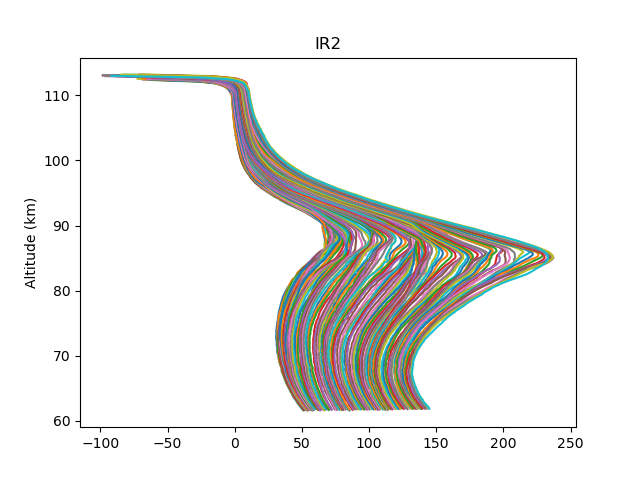

No such comm: 54a36ad818054a0ba6029879f9a8ab76


In [4]:
ch=ir2
plt.close('all')
plt.figure()
for n in range(ch.shape[0]):
    #ch.iloc[n]['EXPDate']=ch.iloc[n]['EXP Date']
    col=int(ch.iloc[n]['NCOL']/2)
    cs=col_heights(ch.iloc[n],col,10,spline=True)

    plt.plot(np.stack(ch.ImageCalibrated.iloc[n])[:,col-2:col+2].mean(axis=1),cs(np.arange(ch.iloc[n]['NROW']))/1000)
plt.ylabel('Altitude (km)')
plt.title(ch.iloc[0]['channel'])

Text(0.5, 1.0, 'IR2')

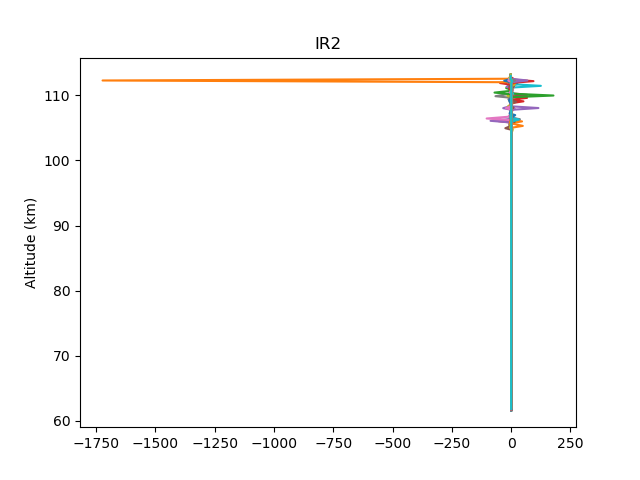

In [5]:
ch=ir2
plt.close('all')
plt.figure()
for n in range(ch.shape[0]):
    #ch.iloc[n]['EXPDate']=ch.iloc[n]['EXP Date']
    col=int(ch.iloc[n]['NCOL']/2)
    cs=col_heights(ch.iloc[n],col,10,spline=True)
    means=np.stack(ch.ImageCalibrated.iloc[n])[:,col-2:col+2].mean(axis=1)
    stds=np.stack(ch.ImageCalibrated.iloc[n])[:,col-50:col+50].std(axis=1)
    plt.plot(stds/means,cs(np.arange(ch.iloc[n]['NROW']))/1000)
plt.ylabel('Altitude (km)')
plt.title(ch.iloc[0]['channel'])

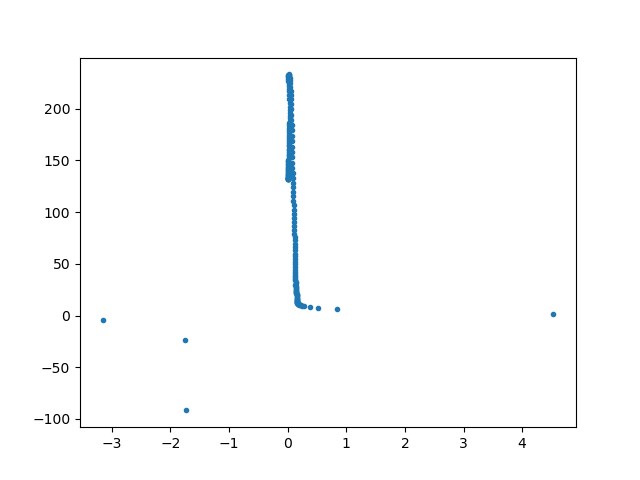

In [6]:
plt.figure()
plt.plot(stds/means, means,'.')

In [7]:
df.to_pickle('noisetesting')

<ipython-input-8-33d3c503c140>:3: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.sqrt(means),stds, '.')


Text(0, 0.5, 'std of 100 values (Witts)')

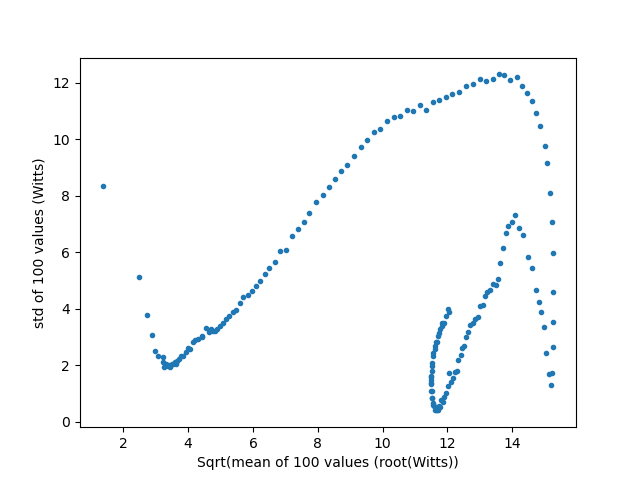

In [8]:
plt.figure()
plt.plot(np.sqrt(means),stds, '.')
plt.xlabel('Sqrt(mean of 100 values (root(Witts))')
plt.ylabel('std of 100 values (Witts)') 

Text(0.5, 1.0, 'IR2')

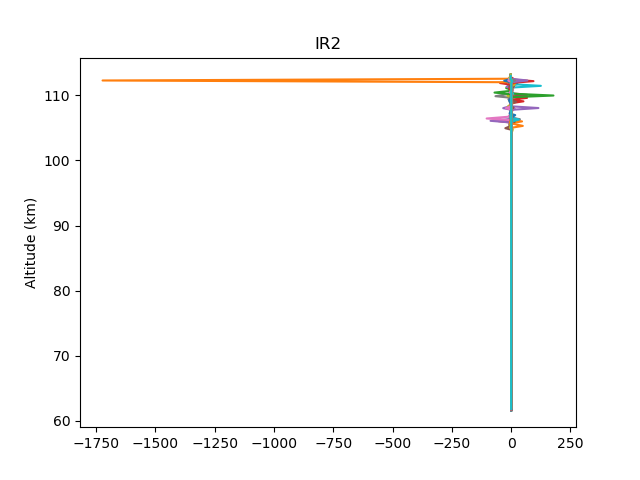

In [9]:
ch=ir2
plt.close('all')
plt.figure()
for n in range(ch.shape[0]):
    #ch.iloc[n]['EXPDate']=ch.iloc[n]['EXP Date']
    col=int(ch.iloc[n]['NCOL']/2)
    cs=col_heights(ch.iloc[n],col,10,spline=True)
    means=np.stack(ch.ImageCalibrated.iloc[n])[:,col-2:col+2].mean(axis=1)
    stds=np.stack(ch.ImageCalibrated.iloc[n])[:,col-50:col+50].std(axis=1)
    plt.plot(stds/means,cs(np.arange(ch.iloc[n]['NROW']))/1000)
plt.ylabel('Altitude (km)')
plt.title(ch.iloc[0]['channel'])

Text(0.5, 1.0, 'IR2')

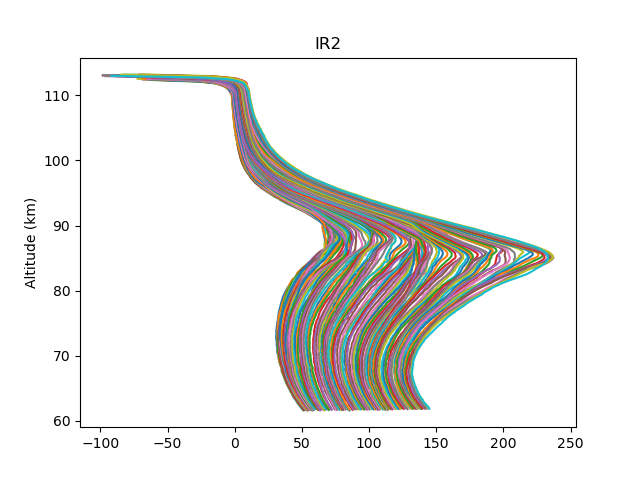

In [10]:
ch=ir2
plt.close('all')
plt.figure()
for n in range(ch.shape[0]):
    #ch.iloc[n]['EXPDate']=ch.iloc[n]['EXP Date']
    col=int(ch.iloc[n]['NCOL']/2)
    cs=col_heights(ch.iloc[n],col,10,spline=True)

    plt.plot(np.stack(ch.ImageCalibrated.iloc[n])[:,col-2:col+2].mean(axis=1),cs(np.arange(ch.iloc[n]['NROW']))/1000)
plt.ylabel('Altitude (km)')
plt.title(ch.iloc[0]['channel'])